# Anemia Detection and Severity Classification in Kenya : A predictive statistics

## 1. Business Understanding

### (a) Introduction

The Kenya Medical Research Institute(KEMRI) is a state corporation established in Kenya in 1979 through the Science and Technology Act, Cap 250 of the Laws of Kenya. It operates under the Science Technology and Innovation Act, 2013 as the national body responsible for carrying out research in human health in Kenya. KEMRI is the medical research arm of the government and provides advice to the Ministry of Health(MOH) on various aspects of healthcare and delivery.

KEMRI's mission is to improve human health and quality of life through research , capacity builging , innovation and service delivery. The Institute conducts research under seven research programs including Biotechnology, Public Health and Health Systems, Sexual Reproductive Adolescent and Child health,Natural Products and Drug Development, Infectios and Parasitic Diseases and Non-Communicable Diseases.

Within the Health Sector, KEMRI is responsible for providing leadership in health research and development, shaping the health research agenga, setting norms and standards, articulating evidence-based policy options, monitoring and assessing health trends as well as dealing with trans-boundary threats and disease outbreaks. The institute further continues to be responsive the challenges of emerging and re-emerging diseases including Non-Communicable Diseases and communicable conditions and bio-terrorism.

Anemia is one of the diseaes that have posed a significant public health problem. Anemia is a condition in which the body lacks enough red blood cells to carry oxygen to the body's tissues. According to the World Health Organization, anemia is a serious global public health problem that particularly affects young children, mensturating adolescent girls, pregnant and postpaturm women.Anemia can be classified in three different levels based on its severity. The severity of the anemia is determined by measuring the level of haemoglobin in the blood.These levels are mild,moderate and severe.

In this project we aim to develop predictive models utilizing factors such as Red blood Cell count,age, sex,white bllod cell count etc to help predict the presence of anemia and its severity in different persons. By critically analyzing this different factors we will be able to help KEMRI which was commisioned by the Ministry of Health to improve on the current diagnostic tools on anemia detection in terms of efficiency and accuracy. By doing this we aim to encourage accurate early predictions which may ultimately lead to accelerated interventions.













### (b) Problem Statement

Efficient and accurate anemia detection, coupled with precise severity measurement, presents a critical challenge in modern healthcare, especially in the context of Kenya's medical landscape. The current diagnostic tools lack the precision needed for early identification, leading to delayed interventions, suboptimal patient outcomes, and escalated healthcare costs due to preventable hospitalizations. In response to this, the Kenya Medical Research Institute (KEMRI), commissioned by the Ministry of Health (MOH), is embarking on a pioneering project. Our goal is to develop predictive models utilizing comprehensive blood count (CBC) parameters, age, and gender data, harnessing the power of machine learning. These models will ease the identification of anemia, to the benefit of patients, healthcare proffesionals, KEMRi and the MOH. Solving this problem may significantly enhance patient care, improve medical decision-making, and alleviate healthcare burdens, contributing data-driven insights to inform healthcare policies and strategies.

### (c) Defining Metrics of Success

The predictive model will be successful if it provides a well defined picture of health care utilization in respect to age, gender and the Comprehensive Blood Count in the blood sample.


### (e) Objectives

##### 1.1 Specific Objection
Determine normal reference ranges for key CBC parameters in this population overall and stratified by age and sex

##### 1.2 Main Objectives
1. Examine the relationship between age and abnormal CBC findings
2. Calculate the proportion of patients with abnormal results for each CBC parameter
3. Compare the prevalence of abnormal CBC results between males and females
4. Analyze the association between RBC indices and anemia to understand RBC characteristics in anemic patients


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset
df = pd.read_csv("CBC data_for_meandeley_csv.csv")

In [3]:
df.head(4)

,S. No.,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT /mm3,HGB
0,NaN,NaN,NaN,Red Blood Cell count,Packed Cell Volume,Mean Cell Volume,Mean Cell Hemoglobin,NaN,Red Cell Distribution width,"White Blood Cell (WBC count),",Platelet,Hemoglobin
1,1.0,28.0,0.0,5.66,34,60.1,17,28.2,20,11.1,128.3,9.6
2,2.0,41.0,0.0,4.78,44.5,93.1,28.9,31.0,13,7.02,419,13.8
3,3.0,40.0,1.0,4.65,41.6,89.5,28.8,32.2,13,8.09,325,13.4


The data seems to have two column names. 

In [4]:
#changing column names
names = ["S.NO","Age","Sex","Red Blood Cell count",
                 	"Packed Cell Volume","Mean Cell Volume",
                    "Mean Cell Hemoglobin",	"MCHC","Red Cell Distribution width",
                    "White Blood Cell (WBC count)","Platelet","Hemoglobin"]
df.columns = names
df.head()

,S.NO,Age,Sex,Red Blood Cell count,Packed Cell Volume,Mean Cell Volume,Mean Cell Hemoglobin,MCHC,Red Cell Distribution width,White Blood Cell (WBC count),Platelet,Hemoglobin
0,NaN,NaN,NaN,Red Blood Cell count,Packed Cell Volume,Mean Cell Volume,Mean Cell Hemoglobin,NaN,Red Cell Distribution width,"White Blood Cell (WBC count),",Platelet,Hemoglobin
1,1.0,28.0,0.0,5.66,34,60.1,17,28.2,20,11.1,128.3,9.6
2,2.0,41.0,0.0,4.78,44.5,93.1,28.9,31.0,13,7.02,419,13.8
3,3.0,40.0,1.0,4.65,41.6,89.5,28.8,32.2,13,8.09,325,13.4
4,4.0,76.0,0.0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264,11.3


dropping the first row.

In [5]:
#dropping the first row
df = df.drop([0],axis=0)
df.head()

,S.NO,Age,Sex,Red Blood Cell count,Packed Cell Volume,Mean Cell Volume,Mean Cell Hemoglobin,MCHC,Red Cell Distribution width,White Blood Cell (WBC count),Platelet,Hemoglobin
1,1.0,28.0,0.0,5.66,34,60.1,17,28.2,20,11.1,128.3,9.6
2,2.0,41.0,0.0,4.78,44.5,93.1,28.9,31.0,13,7.02,419,13.8
3,3.0,40.0,1.0,4.65,41.6,89.5,28.8,32.2,13,8.09,325,13.4
4,4.0,76.0,0.0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264,11.3
5,5.0,20.0,1.0,4.14,36.9,89.1,27.8,31.2,13.2,4.75,196,11.5


Getting the shape of the data

In [6]:
# shape of the data
df.shape

(373, 12)

The dataset has 12 columns and 373 rows

In [7]:
# datatypes of different columns in the data set
datatypes = df.dtypes
dname = [ "DataType"]
dtypedf=pd.DataFrame(datatypes )
dtypedf.columns = dname
dtypedf

,DataType
S.NO,float64
Age,float64
Sex,float64
Red Blood Cell count,object
Packed Cell Volume,object
Mean Cell Volume,object
Mean Cell Hemoglobin,object
MCHC,float64
Red Cell Distribution width,object
White Blood Cell (WBC count),object


The dataset has a both columns which are strings and floats.

In [8]:
# sum of missing data per column
df.isna().sum()

S.NO                            9
Age                             9
Sex                             9
Red Blood Cell count            9
Packed Cell Volume              9
Mean Cell Volume                9
Mean Cell Hemoglobin            9
MCHC                            9
Red Cell Distribution width     9
White Blood Cell (WBC count)    9
Platelet                        9
Hemoglobin                      9
dtype: int64

In [9]:
#dropping the missing data
df= df.dropna()

Checking for duplicate

In [10]:
df.duplicated().sum()

0

The data has no duplicated elements

converting the data types into their respective data type

In [11]:
column_data_types = {
    "S.NO": int,
    "Age": int,
    "Sex": str,
    "Red Blood Cell count": float,
    "Packed Cell Volume": float,
    "Mean Cell Volume": float,
    "Mean Cell Hemoglobin": float,
    "MCHC": float,
    "Red Cell Distribution width": float,
    "White Blood Cell (WBC count)": float,
    "Platelet": float,
    "Hemoglobin": float}
df = pd.DataFrame(df, columns=column_data_types.keys())
df = df.astype(column_data_types)

In [12]:
df.dtypes

S.NO                              int32
Age                               int32
Sex                              object
Red Blood Cell count            float64
Packed Cell Volume              float64
Mean Cell Volume                float64
Mean Cell Hemoglobin            float64
MCHC                            float64
Red Cell Distribution width     float64
White Blood Cell (WBC count)    float64
Platelet                        float64
Hemoglobin                      float64
dtype: object

statistical summary

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.NO,364.0,182.500000,105.221988,1.00,91.750,182.500,273.250,364.00
Age,364.0,44.917582,18.780854,11.00,28.000,44.500,60.000,89.00
Red Blood Cell count,364.0,4.278736,0.820166,1.36,3.780,4.335,4.800,6.90
Packed Cell Volume,364.0,36.762912,6.830835,13.10,32.900,36.800,41.850,56.90
Mean Cell Volume,364.0,87.509121,9.332164,55.70,83.175,87.950,91.875,124.10
Mean Cell Hemoglobin,364.0,28.227143,3.865998,14.70,26.300,28.200,30.400,41.40
MCHC,364.0,32.053407,2.801790,23.60,30.300,31.700,33.300,50.20
Red Cell Distribution width,364.0,15.116511,2.176557,10.60,13.600,14.800,16.100,29.20
White Blood Cell (WBC count),364.0,8.863571,4.868502,2.00,5.900,7.935,10.205,42.42
Platelet,364.0,223.750824,99.407153,10.00,153.000,210.000,268.250,660.00


# Exploratory Data Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

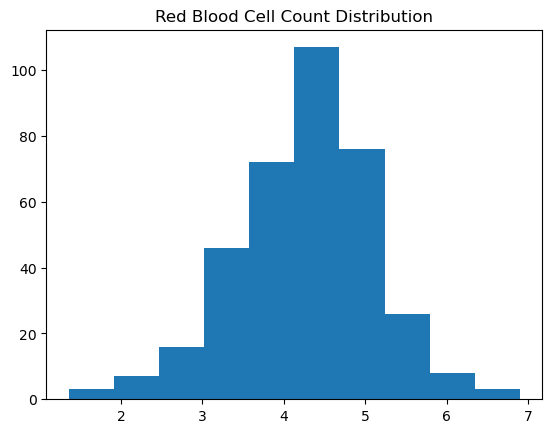

In [37]:
# Univariate analysis
plt.hist(df['Red Blood Cell count'])
plt.title('Red Blood Cell Count Distribution')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

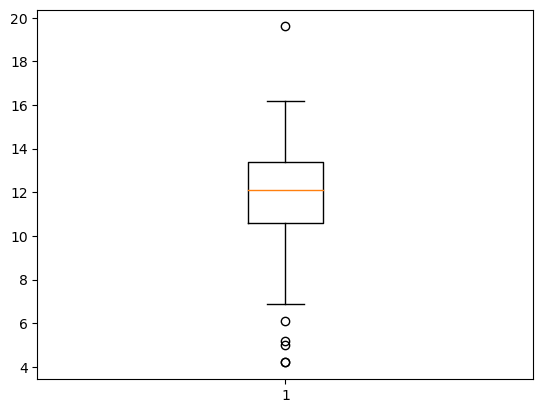

In [26]:
# Distribution plots "continued"
plt.boxplot(df['Hemoglobin'])
plt.show



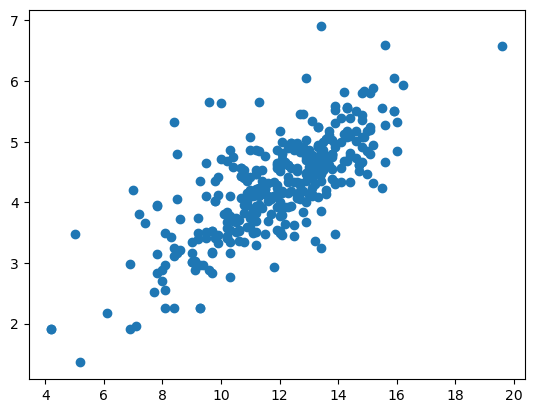

In [28]:
# Bivariate analysis

# Scatterplot
plt.scatter(df['Hemoglobin'], df['Red Blood Cell count'])


In [29]:
# Correlation
print(df['Red Blood Cell count'].corr(df['Hemoglobin']))

0.7465237983415837


In [34]:
# ANOVA 
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Hemoglobin ~ C(Sex)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

               sum_sq     df          F        PR(>F)
C(Sex)     242.760762    1.0  58.862616  1.582092e-13
Residual  1492.957700  362.0        NaN           NaN


In [36]:
from scipy.stats import shapiro, ttest_ind, chi2_contingency
# T-test 
tstat, pval = ttest_ind(df['Hemoglobin'][df['Sex']=='0'], df['Hemoglobin'][df['Sex']=='1'])
print(pval)

nan
